import an API called yfinance to download company's data


In [1]:
import yfinance as yf

In [2]:
ril = yf.Ticker("RELIANCE.NS")
ril = ril.history(period="max")
ril

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-01-01 00:00:00+05:30,10.439797,10.495815,10.371046,10.477991,48051995,0.0,0.0
1996-01-02 00:00:00+05:30,10.452527,10.503453,10.320120,10.396509,77875009,0.0,0.0
1996-01-03 00:00:00+05:30,10.567111,11.048361,10.452528,10.475445,96602936,0.0,0.0
1996-01-04 00:00:00+05:30,10.376141,10.409243,10.238641,10.378687,100099436,0.0,0.0
1996-01-05 00:00:00+05:30,10.337943,10.337943,10.218267,10.307387,76935930,0.0,0.0
...,...,...,...,...,...,...,...
2023-07-17 00:00:00+05:30,2747.000000,2815.050049,2728.000000,2796.699951,10254545,0.0,0.0
2023-07-18 00:00:00+05:30,2817.000000,2837.449951,2793.000000,2820.449951,11937761,0.0,0.0
2023-07-19 00:00:00+05:30,2830.000000,2856.000000,2797.000000,2841.850098,18054869,0.0,0.0


In [3]:
ril.index

DatetimeIndex(['1996-01-01 00:00:00+05:30', '1996-01-02 00:00:00+05:30',
               '1996-01-03 00:00:00+05:30', '1996-01-04 00:00:00+05:30',
               '1996-01-05 00:00:00+05:30', '1996-01-08 00:00:00+05:30',
               '1996-01-09 00:00:00+05:30', '1996-01-10 00:00:00+05:30',
               '1996-01-11 00:00:00+05:30', '1996-01-12 00:00:00+05:30',
               ...
               '2023-07-10 00:00:00+05:30', '2023-07-11 00:00:00+05:30',
               '2023-07-12 00:00:00+05:30', '2023-07-13 00:00:00+05:30',
               '2023-07-14 00:00:00+05:30', '2023-07-17 00:00:00+05:30',
               '2023-07-18 00:00:00+05:30', '2023-07-19 00:00:00+05:30',
               '2023-07-20 00:00:00+05:30', '2023-07-21 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', length=6927, freq=None)

Plotting closing price against index (dates basically)

<Axes: xlabel='Date'>

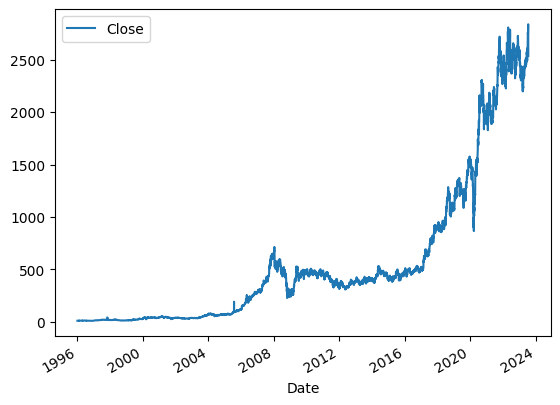

In [4]:
ril.plot.line(y="Close", use_index="True")

Cleaning the data - removing coloumns not required

In [5]:
del ril["Dividends"]
del ril["Stock Splits"]

Will create a coloumn that has prices for the next day

In [6]:
ril["Tomorrow"] = ril["Close"].shift(-1)
ril

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1996-01-01 00:00:00+05:30,10.439797,10.495815,10.371046,10.477991,48051995,10.396509
1996-01-02 00:00:00+05:30,10.452527,10.503453,10.320120,10.396509,77875009,10.475445
1996-01-03 00:00:00+05:30,10.567111,11.048361,10.452528,10.475445,96602936,10.378687
1996-01-04 00:00:00+05:30,10.376141,10.409243,10.238641,10.378687,100099436,10.307387
1996-01-05 00:00:00+05:30,10.337943,10.337943,10.218267,10.307387,76935930,9.894891
...,...,...,...,...,...,...
2023-07-17 00:00:00+05:30,2747.000000,2815.050049,2728.000000,2796.699951,10254545,2820.449951
2023-07-18 00:00:00+05:30,2817.000000,2837.449951,2793.000000,2820.449951,11937761,2841.850098
2023-07-19 00:00:00+05:30,2830.000000,2856.000000,2797.000000,2841.850098,18054869,2619.850098


In [7]:
ril["Target"] = (ril["Tomorrow"] > ril["Close"]).astype(int)
ril

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1996-01-01 00:00:00+05:30,10.439797,10.495815,10.371046,10.477991,48051995,10.396509,0
1996-01-02 00:00:00+05:30,10.452527,10.503453,10.320120,10.396509,77875009,10.475445,1
1996-01-03 00:00:00+05:30,10.567111,11.048361,10.452528,10.475445,96602936,10.378687,0
1996-01-04 00:00:00+05:30,10.376141,10.409243,10.238641,10.378687,100099436,10.307387,0
1996-01-05 00:00:00+05:30,10.337943,10.337943,10.218267,10.307387,76935930,9.894891,0
...,...,...,...,...,...,...,...
2023-07-17 00:00:00+05:30,2747.000000,2815.050049,2728.000000,2796.699951,10254545,2820.449951,1
2023-07-18 00:00:00+05:30,2817.000000,2837.449951,2793.000000,2820.449951,11937761,2841.850098,1
2023-07-19 00:00:00+05:30,2830.000000,2856.000000,2797.000000,2841.850098,18054869,2619.850098,0


Removing data before 2017 (Launch of JIO)
Reason - Mostly same prices since its IPO till announcement of JIO
Is of significantly lesser relevance

In [8]:
ril = ril.loc["2013-07-21":].copy()

Using RandomForestClassifier to predict the prices by splitting the dataset for training and testing

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier (n_estimators=100, min_samples_split=100, random_state=1)

train = ril.iloc[:-100] #entire dataset except last 100 rows
test = ril.iloc[-100:] #last 100 unused rows for testing

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

Importing precision score module of sklearn that tells that whether our predictions were correct or not

In [10]:
from sklearn.metrics import precision_score
import pandas as pd

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

precision_score(test["Target"], preds)

0.49230769230769234

We get somewhere around 0.47 of our predictions correct, which means the model didn't train well

<Axes: xlabel='Date'>

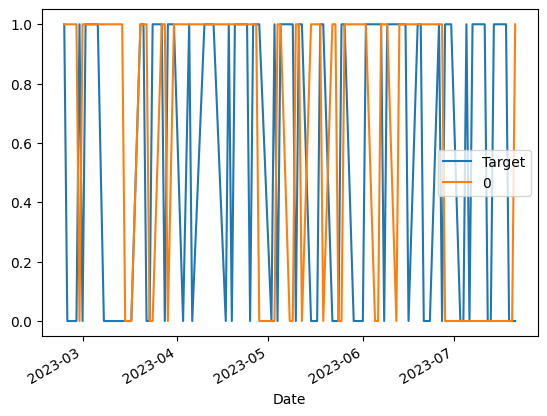

In [11]:
combined = pd.concat([test["Target"], preds], axis=1) #axis=1 treats as coloums
combined.plot()

In [12]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds= pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [13]:
def backtest(data,model, predictors, start=1250, step=250):
    
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train=data.iloc[0:i].copy()
        test=data.iloc[i:(i+step)].copy()
        predictions=predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [14]:
predictions = backtest(ril, model, predictors)
predictions["Predictions"].value_counts()

1    864
0    352
Name: Predictions, dtype: int64

In [15]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5092592592592593

In [16]:
predictions["Target"].value_counts()/predictions.shape[0]

1    0.512336
0    0.487664
Name: Target, dtype: float64

In [17]:
horizons = [2,5,60,250,1000]
#this is done for finding the ratio of closing prices in last 2 days with last 5 days and so on
new_predictors = []

for horizon in horizons:
    rolling_averages = ril.rolling(horizon).mean()
    
    ratio_coloumn = f"Close_Ratio_{horizon}"
    ril[ratio_coloumn] = ril["Close"]/rolling_averages["Close"]
    
    trend_coloumn = f"Trend_{horizon}"
    ril[trend_coloumn] = ril.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_coloumn, trend_coloumn]
ril

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2013-07-22 00:00:00+05:30,426.861877,426.861877,419.374299,424.086121,7826454,424.319397,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-23 00:00:00+05:30,425.485675,431.527069,423.246421,424.319397,5736883,424.226105,0,1.000275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-24 00:00:00+05:30,423.596300,427.748308,417.601587,424.226105,6363428,415.548889,0,0.999890,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-25 00:00:00+05:30,422.639918,425.555657,409.344231,415.548889,7306140,415.268982,0,0.989667,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-26 00:00:00+05:30,416.225344,421.590253,413.076350,415.268982,4414433,413.192963,0,0.999663,0.0,0.987114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-17 00:00:00+05:30,2747.000000,2815.050049,2728.000000,2796.699951,10254545,2820.449951,1,1.010113,1.0,1.012354,3.0,1.112124,35.0,1.125609,128.0,1.340080,516.0
2023-07-18 00:00:00+05:30,2817.000000,2837.449951,2793.000000,2820.449951,11937761,2841.850098,1,1.004228,2.0,1.016847,3.0,1.118074,35.0,1.134346,129.0,1.350445,516.0
2023-07-19 00:00:00+05:30,2830.000000,2856.000000,2797.000000,2841.850098,18054869,2619.850098,0,1.003779,2.0,1.019118,3.0,1.122968,35.0,1.142123,129.0,1.359644,517.0


In [18]:
ril = ril.dropna()
ril

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2017-08-17 00:00:00+05:30,760.499999,774.386760,756.695096,759.579041,7304951,763.602112,1,1.000319,1.0,0.999828,2.0,1.072329,35.0,1.299356,131.0,1.587275,512.0
2017-08-18 00:00:00+05:30,758.076483,764.765389,752.817424,763.602112,3662412,758.270264,0,1.002641,2.0,1.006273,3.0,1.074490,36.0,1.303871,131.0,1.594552,512.0
2017-08-21 00:00:00+05:30,764.377530,767.843172,756.258718,758.270264,3495195,756.161865,0,0.996497,1.0,0.996935,3.0,1.063705,35.0,1.292427,131.0,1.582314,512.0
2017-08-22 00:00:00+05:30,761.954063,765.783215,754.223069,756.161865,4399773,766.825317,1,0.998608,0.0,0.995813,2.0,1.057960,34.0,1.286478,131.0,1.576794,512.0
2017-08-23 00:00:00+05:30,758.488435,769.006493,752.817368,766.825317,3839702,760.039490,0,1.007002,1.0,1.007804,3.0,1.070037,34.0,1.302165,131.0,1.597858,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-14 00:00:00+05:30,2750.000000,2760.899902,2725.100098,2740.699951,6979790,2796.699951,1,0.999581,0.0,0.996531,3.0,1.093120,34.0,1.103752,127.0,1.314220,516.0
2023-07-17 00:00:00+05:30,2747.000000,2815.050049,2728.000000,2796.699951,10254545,2820.449951,1,1.010113,1.0,1.012354,3.0,1.112124,35.0,1.125609,128.0,1.340080,516.0
2023-07-18 00:00:00+05:30,2817.000000,2837.449951,2793.000000,2820.449951,11937761,2841.850098,1,1.004228,2.0,1.016847,3.0,1.118074,35.0,1.134346,129.0,1.350445,516.0


In [19]:
model = RandomForestClassifier(n_estimators=400, min_samples_split=50, random_state=1)

In [20]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds>=.6]=1
    preds[preds<.6]=0
    preds= pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [21]:
predictions = backtest(ril, model, new_predictors)

In [22]:
predictions["Predictions"].value_counts()

1.0    157
0.0     58
Name: Predictions, dtype: int64

In [23]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5095541401273885